# Import and warehouse data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file1=pd.read_csv("Part2 - Data1.csv")

In [3]:
file1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [4]:
file1.shape

(5000, 8)

In [5]:
file2=pd.read_csv("Part2 -Data2.csv")

In [6]:
file2.head(10)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
5,6,155,0,0,1,0,NaN
6,7,0,0,0,1,0,NaN
7,8,0,0,0,0,1,NaN
8,9,104,0,0,1,0,NaN
9,10,0,0,0,0,0,1.0


In [7]:
file2.shape

(5000, 7)

In [8]:
merged = file1.merge(file2, on='ID')
merged.to_csv("output.csv", index=False)

In [9]:
data=pd.read_csv("output.csv")

In [10]:
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [11]:
data.shape

(5000, 14)

In [12]:
data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [13]:
data.isnull().any()

ID                     False
Age                    False
CustomerSince          False
HighestSpend           False
ZipCode                False
HiddenScore            False
MonthlyAverageSpend    False
Level                  False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard              True
dtype: bool

In [14]:
data["LoanOnCard"].unique()

array([nan,  1.,  0.])

In [15]:
data.LoanOnCard.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [16]:
data["LoanOnCard"].isna().sum()

20

In [17]:
data['LoanOnCard'] = data['LoanOnCard'].fillna(0)

In [18]:
data['LoanOnCard'] = data['LoanOnCard'].apply(np.int64)

In [19]:
data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard               int64
dtype: object

In [20]:
data["LoanOnCard"].isna().sum()

0

In [21]:
data['MonthlyAverageSpend'] *= 10

In [22]:
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,16.0,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,15.0,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,10.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,27.0,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,10.0,2,0,0,0,0,1,0


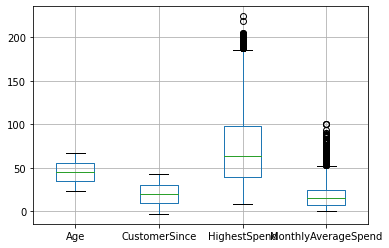

In [23]:
data.boxplot(column=["Age", "CustomerSince","HighestSpend","MonthlyAverageSpend"])

HighestSpend and MonthlyAverageSpend columns have many outliers

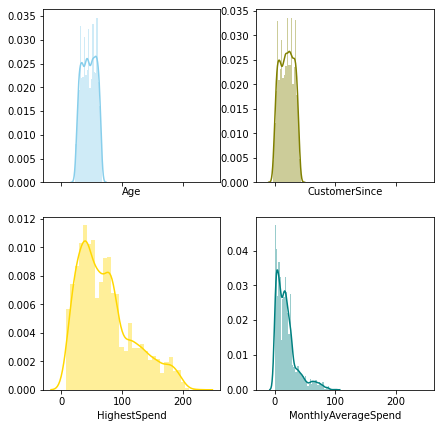

In [24]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( data["Age"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["CustomerSince"] , color="olive", ax=axes[0, 1])
sns.distplot( data["HighestSpend"] , color="gold", ax=axes[1, 0])
sns.distplot( data["MonthlyAverageSpend"] , color="teal", ax=axes[1, 1])


None of the above mentioned variables are normally distributed.

In [25]:
data.corr()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
CustomerSince,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007413
HighestSpend,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZipCode,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
HiddenScore,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
MonthlyAverageSpend,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Level,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Security,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


Loan On Card is dependent on on Highest spend, Monthly average spend,Level,Mortgage,FixedDepositAccount variables

In [26]:
data.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,19.37938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,17.47659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,7.00000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,15.00000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,25.00000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,100.00000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
MonthlyAverageSpend, Mortgage,HighestSpend have many outliers

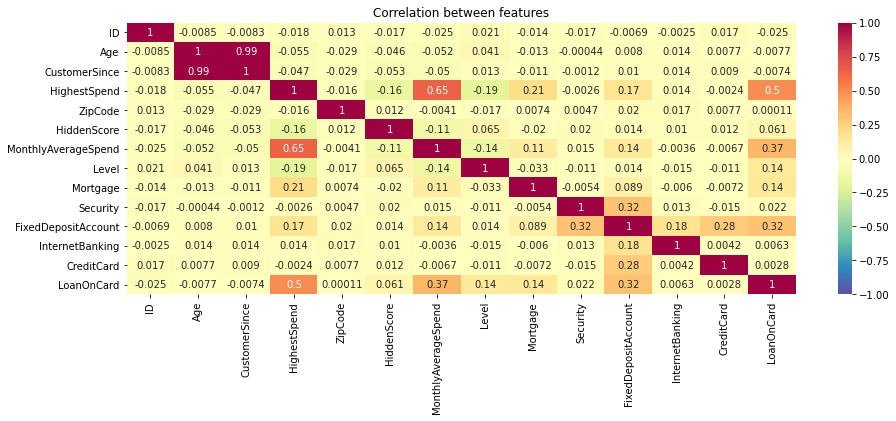

In [27]:
corr = data.corr() 
plt.figure(figsize=(15, 5))

sns.heatmap(corr, cmap='Spectral_r', annot=True, vmax=1.0, vmin=-1.0)

# specify name of the plot
plt.title('Correlation between features')
plt.show()

Highest spent, Monthly Average spend, Fixed Deposit Account have more influence on the taget element Loan On card
ID, Age, Customer Since, Zip code, Hidden Score, Security, Internet Banking, Credit card have very less influence.

In [28]:
data.var()

ID                     2.083750e+06
Age                    1.314042e+02
CustomerSince          1.315140e+02
HighestSpend           2.119104e+03
ZipCode                4.502257e+06
HiddenScore            1.317130e+00
MonthlyAverageSpend    3.054312e+02
Level                  7.053801e-01
Mortgage               1.034570e+04
Security               9.351934e-02
FixedDepositAccount    5.676319e-02
InternetBanking        2.406779e-01
CreditCard             2.076055e-01
LoanOnCard             8.680136e-02
dtype: float64

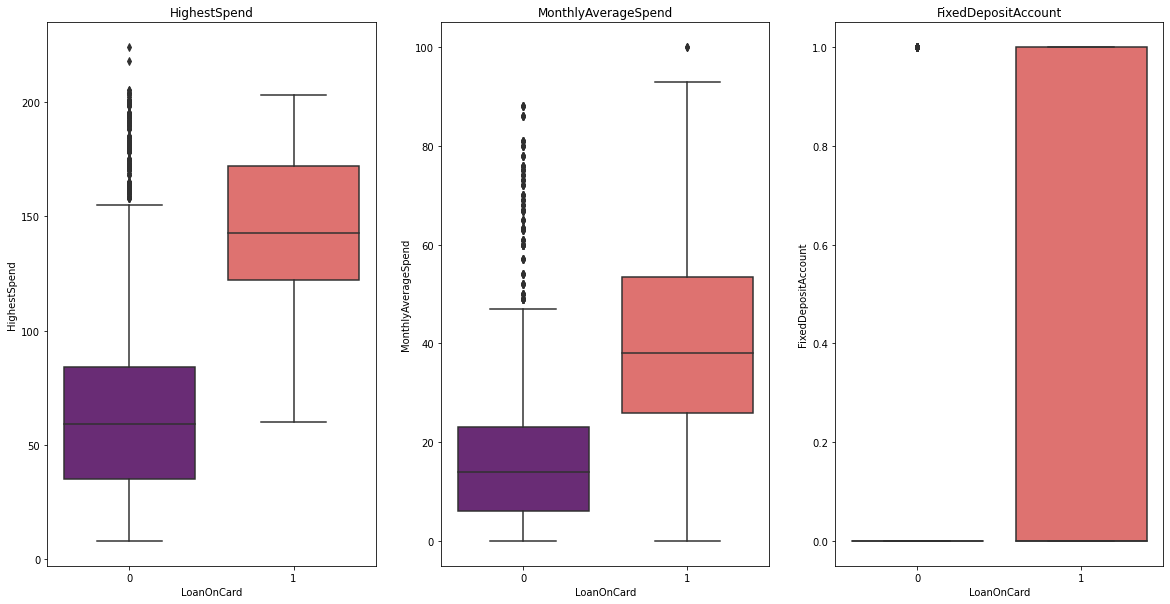

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.title('HighestSpend')
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= data,palette ='magma')

plt.subplot(1, 3, 2)
plt.title('MonthlyAverageSpend')
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= data,palette ='magma')

plt.subplot(1, 3, 3)
plt.title('FixedDepositAccount')
sns.boxplot(x='LoanOnCard', y='FixedDepositAccount', data= data,palette ='magma')


Loan On card aganist Highest spend,Monthly Average Spend have many outliers

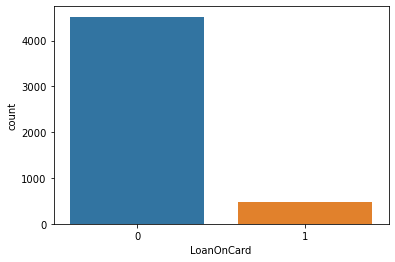

In [30]:
sns.countplot(data['LoanOnCard'])

There is huge imbalance in the dependent variable

# Multivariate Analysis

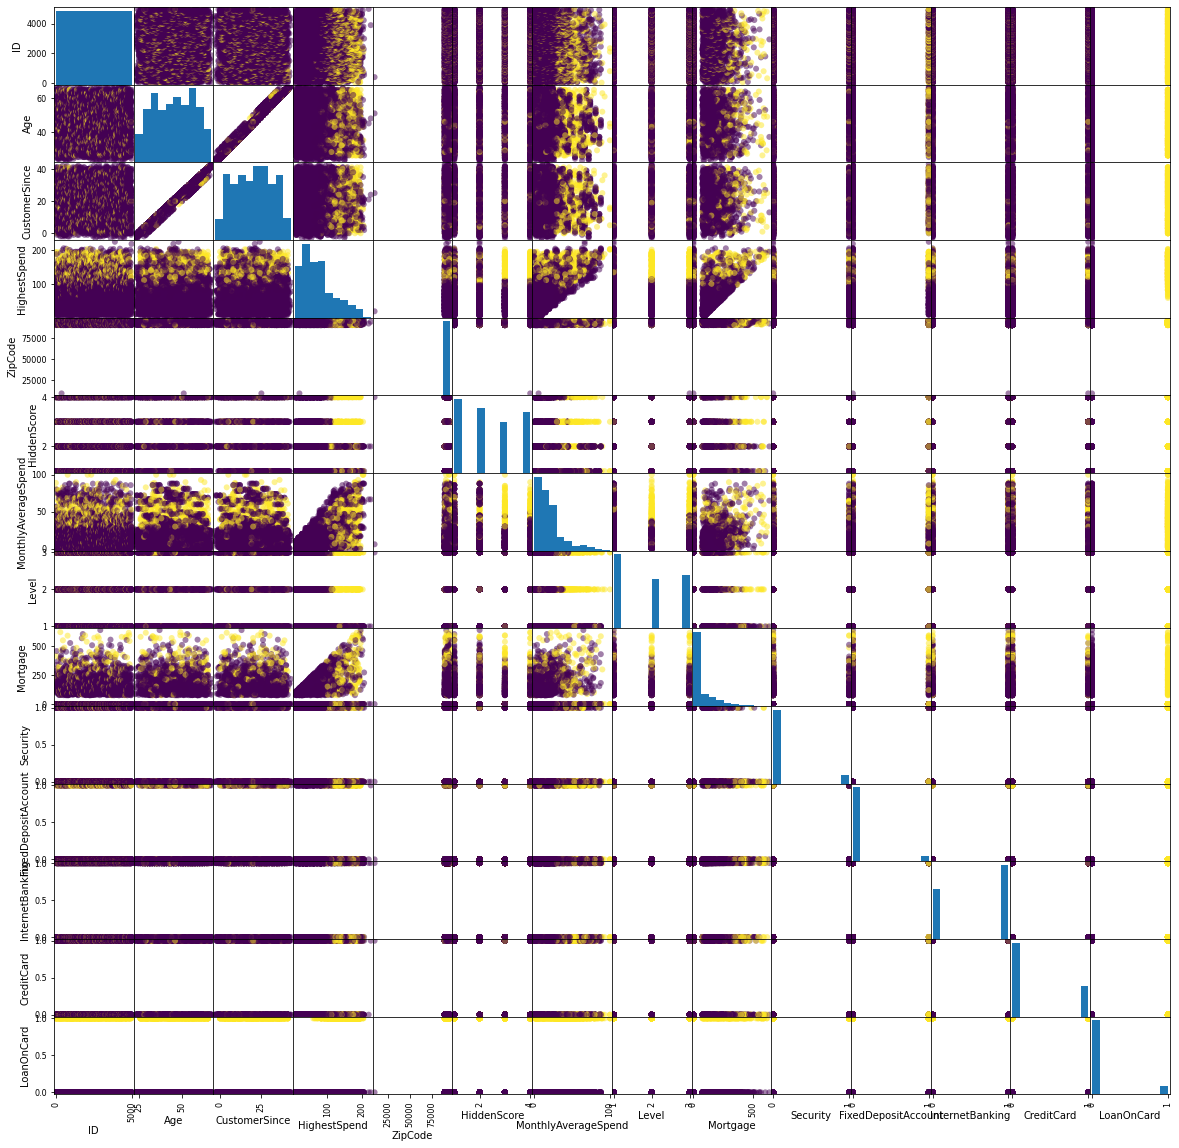

In [31]:
from pandas.plotting import scatter_matrix

splt = scatter_matrix(data, c=data.iloc[:,-1], figsize=(20, 20), marker='o')

# Data Preprocessing

In [34]:
#split dependent and independent variables:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
x=data.iloc[:,1:-1]
y=data["LoanOnCard"]
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(Y))


Original dataset shape Counter({0: 4520, 1: 480})
Resample dataset shape Counter({0: 4520, 1: 4520})


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

# Logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("The accuracy score for Logistic regression is: ",accuracy_score(y_test, y_pred))
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=2))

The accuracy score for Logistic regression is:  0.8783185840707964
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1373
           1       0.86      0.89      0.88      1339

    accuracy                           0.88      2712
   macro avg       0.88      0.88      0.88      2712
weighted avg       0.88      0.88      0.88      2712



Confusion Matrix


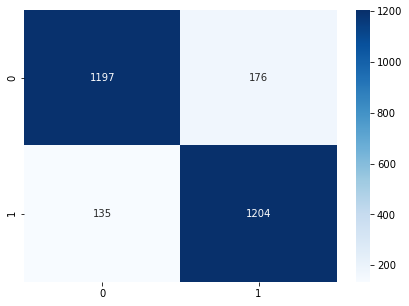

In [50]:
print("Confusion Matrix")
lrcm=metrics.confusion_matrix(y_test, y_test_predict)

df_lrcm = pd.DataFrame(lrcm)
plt.figure(figsize = (7,5))
sns.heatmap(df_lrcm, annot=True,cmap='Blues', fmt='g')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.879


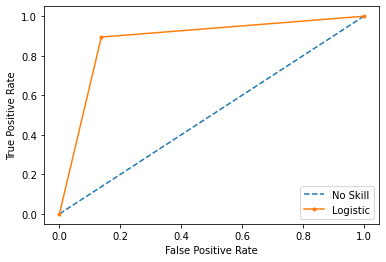

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

#find ROC score:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [51]:
from scipy.stats import zscore
xtrainsc = x_train.apply(zscore)
xtestsc = x_test.apply(zscore)
model1 = LogisticRegression(random_state=0)
model1.fit(xtrainsc, y_train)
model1.score(xtestsc, y_test)

0.8915929203539823

There is no drastic change in standardizing the score

# Naive Bayes Classification

In [46]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 

# creatw the model
Bayesmodel = GaussianNB()

Bayesmodel.fit(x_train, y_train.ravel())
y_trainpredict = Bayesmodel.predict(x_train)
y_test_predict = Bayesmodel.predict(x_test)

#predicting the accuracy of the model

print("Train Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, y_trainpredict)))
print("Test Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_test_predict)))
print(classification_report(y_test, y_test_predict, digits=2))

Train Model Accuracy: 0.8944
Test Model Accuracy: 0.8853
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1373
           1       0.87      0.90      0.89      1339

    accuracy                           0.89      2712
   macro avg       0.89      0.89      0.89      2712
weighted avg       0.89      0.89      0.89      2712



Confusion Matrix


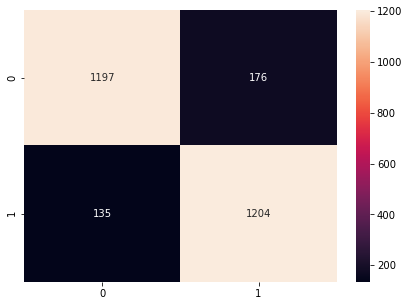

In [45]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_test_predict)

df_cm = pd.DataFrame(cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [54]:
from scipy.stats import zscore
xtrainsc1 = x_train.apply(zscore)
xtestsc1 = x_test.apply(zscore)
model2 = GaussianNB()
model2.fit(xtrainsc1, y_train)
model2.score(xtestsc1, y_test)

0.8856932153392331

# Observations

1.Logistic regression and naive Bayes methods gave almost same accuracy 88 and 89 respectively.
2.standardising the values doesnt have much impact on the accuracy.
3.Highest spent, Monthly Average spend, Fixed Deposit Account, Mortgage have more influence on the target element Loan On card
4.ID, Age, Customer Since, Zip code, Hidden Score, Security, Internet Banking, Credit card have very less influence.
5.Class imbalance is there in loan on card.

1.This is a classification task hence Logistic Regression and Naive Bayes theorem is used here. We can apply any other classification algorithms like SVM, Decision Tree, kNN etc and compare results.